In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-prediction/data.csv


In [33]:
d=pd.read_csv("/kaggle/input/heart-attack-prediction/data.csv")

In [34]:
d.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

In [35]:
d.columns=['age', 'sex', 'cp', 'bp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal','num']

In [36]:
import matplotlib.pyplot as plt
d.head()

,age,sex,cp,bp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


,age,sex,cp,bp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [38]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

,age,sex,cp,bp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [62]:
d["chol"].replace({'?': 0},inplace=True)
#d["age"].replace({'?': 0},inplace=True)
d["bp"].replace({'?': 0},inplace=True)
#d["sex"].replace({'?': 0},inplace=True)
#d["cp"].replace({'?': 0},inplace=True)
#d["num"].replace({'?': 0},inplace=True)

In [71]:
x=np.array(d.iloc[:,1:5])
y=np.array(d[['num']])
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [83]:
yhat_prob = LR.predict_proba(x)
yhat_prob

array([[0.91, 0.09],
       [0.85, 0.15],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.88, 0.12],
       [0.83, 0.17],
       [0.56, 0.44],
       [0.96, 0.04],
       [0.82, 0.18],
       [0.9 , 0.1 ],
       [0.99, 0.01],
       [0.67, 0.33],
       [0.79, 0.21],
       [0.76, 0.24],
       [0.91, 0.09],
       [0.52, 0.48],
       [0.66, 0.34],
       [0.67, 0.33],
       [0.94, 0.06],
       [0.85, 0.15],
       [0.69, 0.31],
       [0.79, 0.21],
       [0.69, 0.31],
       [0.4 , 0.6 ],
       [0.23, 0.77],
       [0.93, 0.07],
       [0.75, 0.25],
       [0.48, 0.52],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.89, 0.11],
       [0.88, 0.12],
       [0.96, 0.04],
       [0.68, 0.32],
       [0.49, 0.51],
       [0.66, 0.34],
       [0.35, 0.65],
       [0.24, 0.76],
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.66, 0.34],
       [0.55, 0.45],
       [0.87, 0.13],
       [0.95, 0.05],
       [0.96, 0.04],
       [0.93,

In [74]:
accuracy = metrics.accuracy_score(y_test, yhat)
accuracy_percentage = 100 * accuracy
accuracy_percentage

74.57627118644068

In [75]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7457627118644068

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[13  6]
 [ 9 31]]


Confusion matrix, without normalization
[[13  6]
 [ 9 31]]


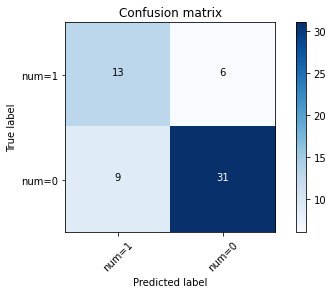

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['num=1','num=0'],normalize= False,  title='Confusion matrix')

In [78]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.59      0.68      0.63        19

    accuracy                           0.75        59
   macro avg       0.71      0.73      0.72        59
weighted avg       0.76      0.75      0.75        59



In [84]:
print(len(d['chol']),len(yhat_prob[:,0]))

294 294


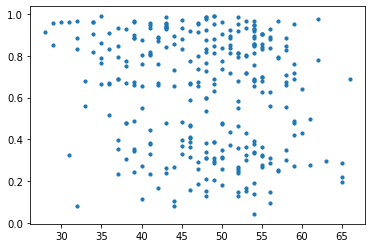

In [98]:
plt.scatter(d['age'],yhat_prob[:,0], s=10)
plt.show()